<a href="https://colab.research.google.com/github/Jeongyeon-Myeong/Python-Project/blob/master/BERT_%ED%95%9C%EA%B5%AD%EC%96%B4_Naver%20Movie_%EB%8D%B0%EC%9D%B4%ED%84%B0_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation**

- Edit > Notebook settings > Hardward accelerators > GPU > SAVE
- Download the Friends dataset in EmotionLines website:
http://doraemon.iis.sinica.edu.tw/emotionlines/download.html
- Download the unlabeled json file.

# **Tutorials**

##### **Settings**

In [ ]:
!pip install transformers --quiet # package installer for python

     |████████████████████████████████| 1.5MB 5.8MB/s 
     |████████████████████████████████| 2.9MB 40.4MB/s 
     |████████████████████████████████| 890kB 41.5MB/s 


In [ ]:
import torch
from transformers import BertModel, BertTokenizer

In [ ]:
pretrained_weights = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(pretrained_weights) #bert tokenizer
model = BertModel.from_pretrained(pretrained_weights) # bert model

##### **Tokenization**

In [ ]:
#예시 문장
sentence = '완전 감동적인 영화네'

In [ ]:
 #bert tokenizer로 토큰화
tokens = tokenizer.tokenize(sentence) #['[CLS]', 'all', 'the', 'classes', 'are', 'provided', '.', '[SEP]']
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

['[CLS]', '완', '##전', '감', '##동', '##적인', '영화', '##네', '[SEP]']


In [ ]:
# token하여 id로 바꾼다.[[101, 2035, 1996, 4280, 2024, 3024, 1012, 102]]
#Converts a token string (or a sequence of tokens) in a single integer id (or a sequence of ids), using the vocabulary.
ids = [tokenizer.convert_tokens_to_ids(tokens)]
print(ids)

[[101, 9591, 16617, 8848, 18778, 15387, 42428, 77884, 102]]


In [ ]:
#tensor로 변경, tensor([[ 101, 2035, 1996, 4280, 2024, 3024, 1012,  102]])
input_tensor = torch.tensor(ids)
#masks_tensor = torch.tensor(attention_masks)

In [ ]:
print(masks_tensor.size())

torch.Size([1, 19])


In [ ]:
# 추가 고려사항!! 
# 입력토큰의 최대 시퀀스 길이에 대해 max length를 구하고 모자른 부분을 0으로 채워준다

##### **Model**

In [ ]:
# id값을 bert모델에 넣기
hidden_tensor = model(input_tensor, attention_mask = masks_tensor)[0]
print(hidden_tensor.size())

torch.Size([1, 19, 768])


In [ ]:
hidden_tensor

tensor([[[-0.3332,  0.3654,  0.1161,  ..., -0.1596,  0.2420,  0.5352],
         [ 0.5816,  0.3318,  0.3934,  ...,  0.2164,  0.3406, -0.2485],
         [-0.0190,  0.4895,  0.4740,  ..., -0.3352,  0.3113,  0.3196],
         ...,
         [ 0.1850,  0.4164,  0.4646,  ...,  0.0479, -0.0294, -0.1171],
         [ 0.3209,  0.3451,  0.4535,  ...,  0.0429, -0.0533, -0.0560],
         [ 0.3667,  0.3243,  0.4432,  ...,  0.0751, -0.0630, -0.0889]]],
       grad_fn=<NativeLayerNormBackward>)

In [ ]:
#torch.Size([1, 8, 768])
logit = torch.nn.Linear(768, 2)(hidden_tensor)
print(logit.size())
print(logit.data)

torch.Size([1, 19, 2])
tensor([[[-0.0394, -0.6272],
         [ 0.2332, -0.5167],
         [ 0.0976,  0.0890],
         [-0.2424, -0.4108],
         [-0.0234, -0.1241],
         [-0.0410, -0.3244],
         [ 0.0504, -0.0833],
         [-0.0383,  0.0512],
         [ 0.2636, -0.4400],
         [ 0.4942, -0.0908],
         [ 0.3496, -0.3235],
         [ 0.5387, -0.3592],
         [ 0.2215, -0.2635],
         [ 0.6073, -0.4124],
         [ 0.4209, -0.2905],
         [ 0.1868, -0.2592],
         [ 0.2577, -0.2580],
         [ 0.1927, -0.2361],
         [ 0.1884, -0.2572]]])


In [ ]:
prediction = torch.nn.Softmax(dim=-1)(logit)
print(prediction.size())
print(prediction.data)

torch.Size([1, 19, 2])
tensor([[[0.6429, 0.3571],
         [0.6792, 0.3208],
         [0.5021, 0.4979],
         [0.5420, 0.4580],
         [0.5252, 0.4748],
         [0.5704, 0.4296],
         [0.5334, 0.4666],
         [0.4777, 0.5223],
         [0.6690, 0.3310],
         [0.6422, 0.3578],
         [0.6622, 0.3378],
         [0.7105, 0.2895],
         [0.6189, 0.3811],
         [0.7349, 0.2651],
         [0.6707, 0.3293],
         [0.6097, 0.3903],
         [0.6262, 0.3738],
         [0.6056, 0.3944],
         [0.6096, 0.3904]]])


# **Emotion Recognition**

**Train and Dev Dataset**

In [ ]:
# 네이버 영화리뷰 감정분석 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [ ]:
# 디렉토리의 파일 목록
!ls nsmc -la

total 38628
drwxr-xr-x 5 root root     4096 Dec 23 12:43 .
drwxr-xr-x 1 root root     4096 Dec 23 12:43 ..
drwxr-xr-x 2 root root     4096 Dec 23 12:43 code
drwxr-xr-x 8 root root     4096 Dec 23 12:43 .git
-rw-r--r-- 1 root root  4893335 Dec 23 12:43 ratings_test.txt
-rw-r--r-- 1 root root 14628807 Dec 23 12:43 ratings_train.txt
-rw-r--r-- 1 root root 19515078 Dec 23 12:43 ratings.txt
drwxr-xr-x 2 root root   450560 Dec 23 12:43 raw
-rw-r--r-- 1 root root     2596 Dec 23 12:43 README.md
-rw-r--r-- 1 root root    36746 Dec 23 12:43 synopses.json


In [ ]:
import pandas as pd

# 판다스로 훈련셋과 테스트셋 데이터 로드
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
dev = pd.read_csv("nsmc/ratings_test.txt", sep='\t') # test data를 dev dataset으로 사용

print(train.shape)
print(dev.shape)

(150000, 3)
(50000, 3)


In [ ]:
# 훈련셋의 앞부분 출력
dev.head(10)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [ ]:
# dataframe을 list형태로 변경함.
train_utterance = train['document'].values.tolist()
dev_utterance = dev['document'].values.tolist()
train_emotion = train['label'].values.tolist()
dev_emotion = dev['label'].values.tolist()

In [ ]:
 train['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
def token_input(utterance):
  for i in range(len(utterance)):
      utterance[i] = '[CLS] ' + str(utterance[i]) + ' [SEP] [PAD]' 

In [ ]:
token_input(train_utterance)
token_input(dev_utterance)

In [ ]:
# train과 dev dataset 
"""
for i in range(len(train_utterance)):
   train_utterance[i] = train_speaker[i] + ', ' + train_utterance[i]
for i in range(len(dev_utterance)):
   dev_utterance[i] = dev_speaker[i] + ', ' + dev_utterance[i]   
"""

"\nfor i in range(len(train_utterance)):\n   train_utterance[i] = train_speaker[i] + ', ' + train_utterance[i]\nfor i in range(len(dev_utterance)):\n   dev_utterance[i] = dev_speaker[i] + ', ' + dev_utterance[i]   \n"

리뷰의 최대 길이 : 164
리뷰의 평균 길이 : 53.203453333333336


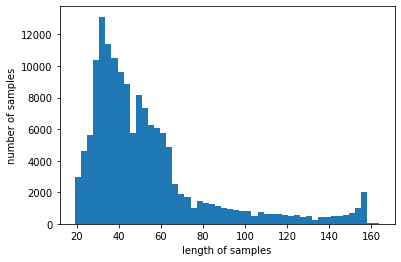

In [ ]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(l) for l in train_utterance))
print('리뷰의 평균 길이 :',sum(map(len, train_utterance))/len(train_utterance))
plt.hist([len(s) for s in train_utterance], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# padding의 max length 설정
MAX_LEN = 160

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from transformers import BertModel, BertTokenizer
def tokenize(dataset):
  # 입력 토큰의 최대 시퀀스 길이
  tokenized_utterance = [ str(sentence) for sentence in dataset ]
  # token화 하기
  tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
  tokenized_utterance = [tokenizer.tokenize(sent) for sent in tokenized_utterance]
  # 인덱스로 변환하기 
  ids_utterance = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_utterance] 
  # 패딩 채우기
  ids_utterance = pad_sequences(ids_utterance, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
  return ids_utterance

In [ ]:
token_train_utterance = tokenize(train_utterance)
token_dev_utterance = tokenize(dev_utterance)

In [ ]:
# 어텐션 마스크 
# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
def mask_func(masklist, targetdata):
  for seq in targetdata:
    seq_mask = [float(i>0) for i in seq]
    masklist.append(seq_mask)
  print(masklist[0])

In [ ]:
# train과 dev data
masks_train_utterance = []
masks_dev_utterance = []
mask_func(masks_train_utterance, token_train_utterance) 
mask_func(masks_dev_utterance, token_dev_utterance)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
"""
import pandas as pd
df = pd.DataFrame(friendsdata_train_dict, columns= ['utterance'])
df_list = df.values.tolist()
"""

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from transformers import BertModel, BertTokenizer

class Dataset():
  def __init__(self, x, y, z):
    self.utterance = x
    self.emotion = y
    self.mask = z
 
  def __len__(self): 
    return len(self.utterance)

  def __getitem__(self, idx):
    input_tensor = torch.tensor(self.utterance[idx])
    labels_tensor = torch.tensor(self.emotion[idx])
    mask_tensor = torch.tensor(self.mask[idx])
    return input_tensor,labels_tensor, mask_tensor

In [ ]:
train_dataset = Dataset(token_train_utterance, train_emotion, masks_train_utterance)
dev_dataset = Dataset(token_dev_utterance, dev_emotion, masks_dev_utterance)

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=32, shuffle=True)

**Test dataset**

In [ ]:
# test dataset load
import csv
dialogs = []

with open('ko_data.csv', newline='', encoding='cp949') as csvfile:
  dataread = csv.reader(csvfile)
  for i,row in enumerate(dataread):
    if i!=0:
      dialogs.append([row[0], row[1]])

# test data frame load
df_test = pd.DataFrame(dialogs, columns=['Id','Sentence'])
test_Id = df_test['Id'].values.tolist()
test_utterance = df_test['Sentence'].values.tolist()

In [ ]:
# tag cls, sep, pad 넣기
token_input(test_utterance)

In [ ]:
test_utterance

['[CLS] 정말 많이 울었던 영화입니다. [SEP] [PAD]',
 '[CLS] 시간 낭비예요. [SEP] [PAD]',
 '[CLS] 포스터를 저렇게밖에 만들지 못했던 제작자의 소심함에 침을 뱉고 싶다. [SEP] [PAD]',
 '[CLS] 지금 봐도 재미있는 영화!!! 코믹과 감동!!! 그리고 요리!!! [SEP] [PAD]',
 '[CLS] 이걸 영화로 만드는 거야?얼마나 가는지 보자. [SEP] [PAD]',
 '[CLS] 잔잔한 감동을 주는 영화가 좋은 영화다. 줄리안 무어의 매력! [SEP] [PAD]',
 '[CLS] 프랑스 영화, 정말 재미없다는 말밖에... [SEP] [PAD]',
 '[CLS] 이보다 더 자연스러울 수는 없다. [SEP] [PAD]',
 '[CLS] 잠만 자고 있었는데~~ [SEP] [PAD]',
 '[CLS] 오프닝 씬이... (이 영화와 젊음에 대해 말한다.) [SEP] [PAD]',
 '[CLS] 내용도 재미있고~ 유덕화가 가장 멋지게 나온 영화들~ [SEP] [PAD]',
 '[CLS] 영화는 없고 색깔만 있다 [SEP] [PAD]',
 '[CLS] 홍성진 영화해설자님우뢰매를 욕하다니... [SEP] [PAD]',
 '[CLS] 이게 뭐라고... [SEP] [PAD]',
 '[CLS] 우울한 작가주의인 척 [SEP] [PAD]',
 '[CLS] 재밌는데... [SEP] [PAD]',
 '[CLS] 최고...녹화 찍어놓은 걸 볼 수 있어서 정말 다행이야.. [SEP] [PAD]',
 '[CLS] 보면서 동감을 많이 해요. 보면 남의 일이 아닌 것 같아요. 수고하십시요 [SEP] [PAD]',
 '[CLS] 역시 강 씨. [SEP] [PAD]',
 '[CLS] 오오~ 정말 좋아해요!! [SEP] [PAD]',
 '[CLS] 진저얼굴짱 몸짱!! 정말 이뻐! [SEP] [PAD]',
 '[CLS] 감동과 함께 감성을 자극해 줍니다. [SEP] [PAD]',
 '[CLS] 힘과 강렬함...정말로 산뜻한 영화다.. [SEP]

In [ ]:
token_test_utterance = tokenize(test_utterance)

In [ ]:
 # test mask id 생성
masks_test_utterance = []
mask_func(masks_test_utterance, token_test_utterance) 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# test 데이터를 텐서로 변환
test_inputs = torch.tensor(token_test_utterance)
test_masks = torch.tensor(masks_test_utterance)

print(test_inputs[0])
print(test_masks[0])

tensor([  101,  9670, 89523, 47058,  9607, 61439, 42428, 58303, 48345,   119,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

##### **Hyper-parameters**

In [ ]:
pretrained_weights = 'bert-base-multilingual-cased'
learning_rate = 2e-5 # 1e-5
n_epoch = 2


##### **Model**

In [ ]:
import torch.nn as nn
from transformers import BertModel, BertTokenizer

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.bert_model = BertModel.from_pretrained(pretrained_weights, num_labels=2)
    self.linear = torch.nn.Linear(768, 2) 

  def forward(self, input_tensor, input_mask):
    hidden_tensor = self.bert_model(input_tensor,attention_mask=input_mask)[0] # (bat, len, hid)
    hidden_tensor = hidden_tensor[:, 0, :] # (bat, hid)
    logit = self.linear(hidden_tensor)
    return logit

##### **Evaluation Metrics**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate(true_list, pred_list):
  print(pred_list)
  print(true_list)
  precision = precision_score(true_list, pred_list, average=None)
  recall = recall_score(true_list, pred_list, average=None)
  micro_f1 = f1_score(true_list, pred_list, average='micro')

  # 출력 로짓과 라벨을 비교하여 정확도 계산
  eval_accuracy = flat_accuracy(pred_list, true_list)
  print('precision: ', ['%.4f' % v for v in precision])
  print('recall:\t\t', ['%.4f' % v for v in recall])
  print('micro_f1: %.6f' % micro_f1)
  print("Accuracy: {0:.2f}".format(eval_accuracy))

##### **Training**

In [ ]:
# GPU 디바이스 이름 구함
import tensorflow as tf
device_name = tf.test.gpu_device_name()

# GPU 디바이스 이름 검사
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
# 디바이스 설정
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:

n_epoch = 2
for i_epoch in range(0, n_epoch):
  for batch_idx, batch_data in enumerate(dev_dataloader): 
    b_input_ids, b_labels, b_input_mask = batch_data
    #print(b_input_ids.size()) # torch.Size([32, 160])
    #print(b_labels.size())  # torch.Size([32])
    #print(b_input_mask.size()) #torch.Size([32, 160])
    print(b_input_ids[batch_idx]) # torch.Size([32, 160])
    print(b_labels[batch_idx])  # torch.Size([32])
    print(b_input_mask[batch_idx]) #torch.Size([32, 160])

tensor([   101,   9004,  32537,   9651,  63243,  14801,  44359,   9523,  16985,
         12424,   9685, 119118,  12965,  48549,    119,    119,    119,   9580,
        118856,  19105,  10530,   9653, 119196,  11102,   9565,  21614,  84177,
         53736, 119147,  12965,  48549,    102,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

IndexError: ignored

In [ ]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = preds.flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
from tqdm import tqdm_notebook # tqdm_notebook 진행 표시바
import numpy as np
 
batch_size=32
model = Model() #정의된 모델 수행
model.cuda()
criterion = torch.nn.CrossEntropyLoss() # LogSoftmax & NLLLoss, tf.nn.weighted_cross_entropy_with_logits
#class_weight = torch.FloatTensor(weights).cuda()
#criterion = torch.nn.CrossEntropyLoss(weight = class_weight)
optimizer = torch.optim.Adam(model.parameters(), learning_rate) #gradient descent 알고리즘 : Adam

for i_epoch in range(n_epoch + 1):
  print('i_epoch:', i_epoch)
  train_loss = 0 
  model.train()
  for batch_idx, batch_data in enumerate(train_dataloader): 

    # 배치를 GPU에 넣음
    batch_data = tuple(t.to(device) for t in batch_data)
    
    # 배치에서 데이터 추출
    b_input_ids, b_labels, b_input_mask = batch_data

    # 배치에서 데이터 추출
    logit = model(b_input_ids, b_input_mask)
    batch_loss = criterion(logit, b_labels)
    train_loss += batch_loss.item()
      
    ########## jeong test ########
    # dimension 확인
    #print (logit.size()) #torch.Size([4, 1])
    #print (logit)  
    #print (b_labels.size()) #torch.Size([4, 1])
    #print (b_labels)  
    ########## jeong test ########
    
    model.zero_grad()
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print('Epoch: ', i_epoch + 1)
    print("\r" + "{0}/{1} loss: {2} ".format(batch_idx, len(train) / batch_size, train_loss / (batch_idx + 1)))  

  #시작 시간 설정
  t0 = time.time()

  # 평가모드로 변경
  bert_predicted = []
  all_logits = []
  model.eval()
  pred_list, true_list = np.array([]), np.array([])
  if torch.cuda.is_available():
    for batch_idx, batch_data in enumerate(dev_dataloader):
      # 배치를 GPU에 넣음
      batch_data = tuple(t1.to(device) for t1 in batch_data)
      # 배치에서 데이터 추출
      b_input_ids, b_labels, b_input_mask = batch_data
      logit = model(b_input_ids, b_input_mask)
      _, max_idx = torch.max(logit, dim=-1) # tensor
    
      numpy_max_idx = max_idx.detach().cpu().numpy() 
      b_labels = b_labels.detach().cpu().numpy() 

      pred_list = np.append(pred_list, numpy_max_idx)
      true_list = np.append(true_list, b_labels)
    
  evaluate(pred_list, true_list) # print results

i_epoch: 0
Epoch:  1
0/2343.75 loss: 0.7993124723434448 
Epoch:  1
1/2343.75 loss: 0.7538748979568481 
Epoch:  1
2/2343.75 loss: 0.7400270104408264 
Epoch:  1
3/2343.75 loss: 0.7274143695831299 
Epoch:  1
4/2343.75 loss: 0.7372400522232055 
Epoch:  1
5/2343.75 loss: 0.7237531542778015 
Epoch:  1
6/2343.75 loss: 0.7269537023135594 
Epoch:  1
7/2343.75 loss: 0.7328879907727242 
Epoch:  1
8/2343.75 loss: 0.7368628713819716 
Epoch:  1
9/2343.75 loss: 0.7333591222763062 
Epoch:  1
10/2343.75 loss: 0.7324114333499562 
Epoch:  1
11/2343.75 loss: 0.728434681892395 
Epoch:  1
12/2343.75 loss: 0.7265577499683087 
Epoch:  1
13/2343.75 loss: 0.7218483686447144 
Epoch:  1
14/2343.75 loss: 0.7195383151372273 
Epoch:  1
15/2343.75 loss: 0.7198252938687801 
Epoch:  1
16/2343.75 loss: 0.7161251411718481 
Epoch:  1
17/2343.75 loss: 0.7147836122247908 
Epoch:  1
18/2343.75 loss: 0.711703287927728 
Epoch:  1
19/2343.75 loss: 0.7092449605464936 
Epoch:  1
20/2343.75 loss: 0.7084062553587414 
Epoch:  1
21/2

RuntimeError: ignored

##### **Labeling**


In [ ]:
print(test_inputs[0].unsqueeze(0))
print(test_masks[0].unsqueeze(0))


tensor([[  101,  9670, 89523, 47058,  9607, 61439, 42428, 58303, 48345,   119,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

In [ ]:
# 문장 테스트
def test_sentences(inputs, masks):
    
    # 평가모드로 변경
    model.eval()

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)

    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, b_input_mask)
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    #logits = logits.detach().cpu().numpy()
    
    return logits

In [ ]:
pred_label=[]
for i in range(len(test_inputs)):
  input_id = test_inputs[i].unsqueeze(0)
  input_mask =  test_masks[i].unsqueeze(0)
  logits = test_sentences(input_id,input_mask)
  #pred_flat = np.argmax(logits).flatten()
  _, max_idx = torch.max(logits, dim=-1) # tensor
  pred_emotion = max_idx.tolist()
  pred_label.append(pred_emotion)

In [ ]:
df = pd.DataFrame(df_test, columns=['Id'])
df['Predicted'] = pred_label
print(df)

          Id  Predicted
0          0          1
1          1          0
2          2          0
3          3          1
4          4          0
...      ...        ...
11182  11182          1
11183  11183          0
11184  11184          1
11185  11185          1
11186  11186          0

[11187 rows x 2 columns]


In [ ]:
df.to_csv("test_naver_sentiment.csv", sep=",",index=False)

##### **Proposal**

- There is a class imbalance problem. (Use weighted cross-entropy etc.)

- Our model takes a single sentence. (Make it grasp its context as well.)

- Our model does not consider speaker information. (Make it consider the info.)

- Batch size is set as 1. (Increase the batch size.)